# Seaborn Tutorial 

In this notebook, we will learn how to use Seaborn — a powerful Python library for creating beautiful, informative visualizations from biological data.

## What is Seaborn?
- Seaborn is built on top of matplotlib and makes it easier to create attractive charts.
- It's especially great for exploring data patterns and statistical relationships.
- In biosciences, you might use Seaborn to visualize enzyme activity, protein expression, drug response curves, etc.


# Let's get started!



In [1]:
# Import necessary libraries
import seaborn as sns        # seaborn for visualization
import pandas as pd          # pandas for data handling
import matplotlib.pyplot as plt  # matplotlib for displaying plots

# Enable inline plotting (for Jupyter notebooks)
%matplotlib inline

In [2]:
# Load built-in dataset
tips = sns.load_dataset("tips")
#Show me a quick preview of the table
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Dataset Overview

The **tips** dataset contains records of meals in a restaurant. It includes:

- `total_bill`: total cost of the meal
- `tip`: tip amount
- `sex`: customer gender
- `smoker`: whether the customer smokes
- `day`: day of the week
- `time`: lunch or dinner
- `size`: number of people at the table

## Scatter Plot

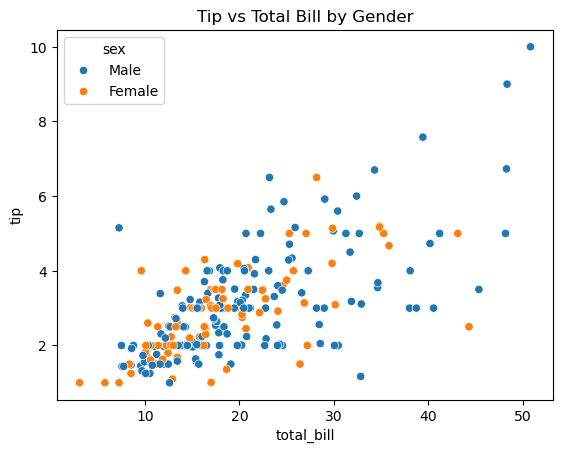

In [3]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")
plt.title("Tip vs Total Bill by Gender")
plt.show()

## Box Plot

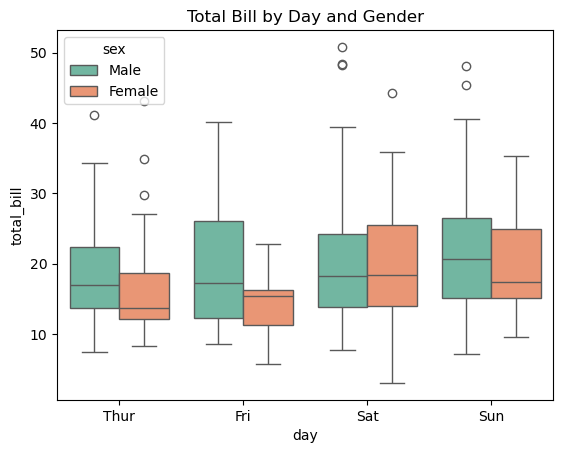

In [4]:
sns.boxplot(data=tips, x="day", y="total_bill", hue="sex", palette="Set2")
plt.title("Total Bill by Day and Gender")
plt.show()


## Bar Plot

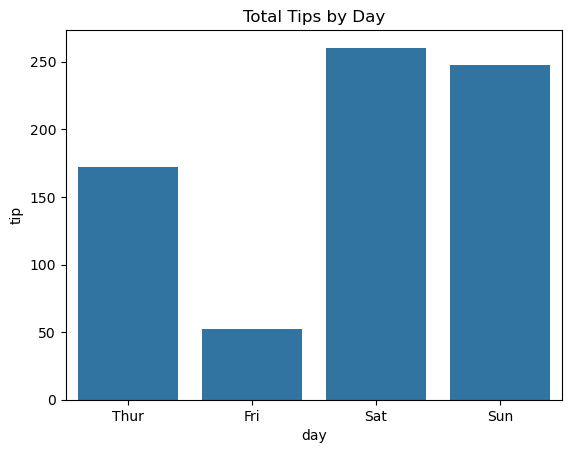

In [5]:
sns.barplot(data=tips, x="day", y="tip", estimator=sum, errorbar=None)
plt.title("Total Tips by Day")
plt.show()


## Pair Plot

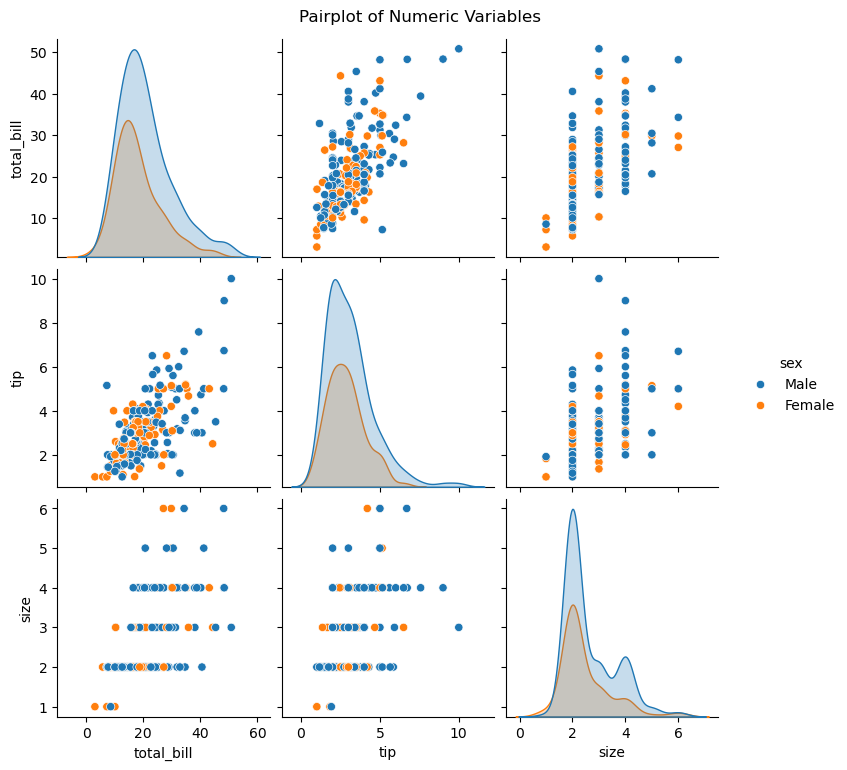

In [6]:
sns.pairplot(tips, hue="sex")
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()

## Summary

- `sns.scatterplot()` shows the relationship between two variables.
- `sns.boxplot()` shows distributions and outliers.
- `sns.barplot()` shows grouped summary statistics.
- `sns.pairplot()` visualizes pairwise relationships between multiple variables.

Seaborn makes it quick to generate great-looking plots with minimal code.

---
# Seaborn continued

## 1. FacetGrid: Multiple Plots by Category

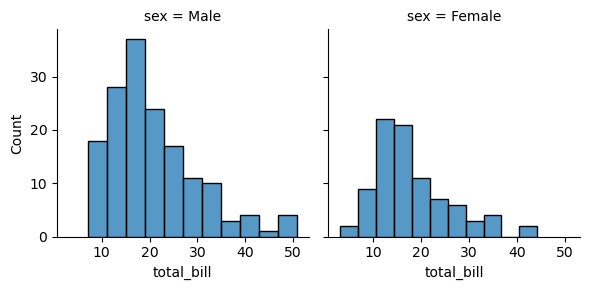

In [7]:
# FacetGrid: Create a grid of plots split by 'sex'
g = sns.FacetGrid(tips, col="sex")
g.map(sns.histplot, "total_bill")

# You can also try row="time" or hue="smoker" for variations


## 2. Heatmap: Correlation Between Numeric Columns

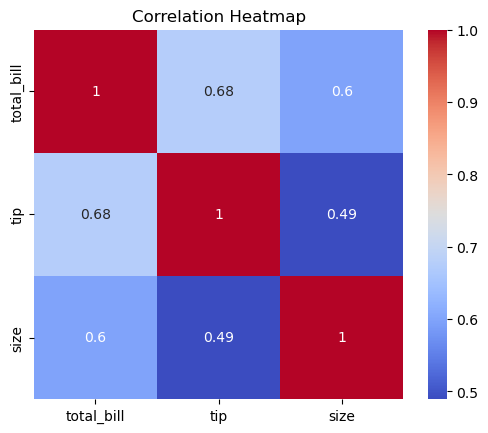

In [8]:
# Compute correlation matrix
corr = tips.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


## 3. Regplot: Scatter Plot with Regression Line

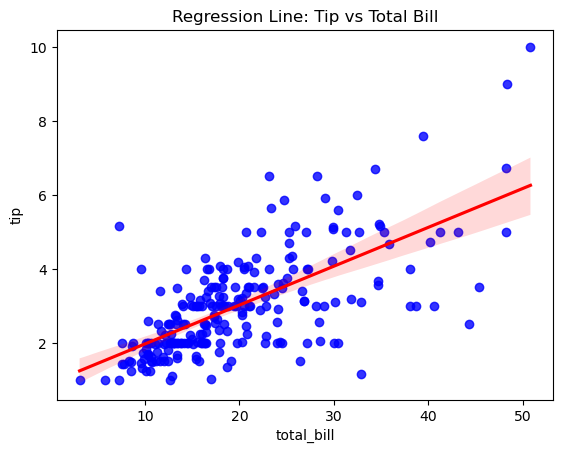

In [9]:
# Scatterplot with a regression line
sns.regplot(data=tips, x="total_bill", y="tip", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Line: Tip vs Total Bill")
plt.show()


## Example Dataset: Simulated Protein Expression Data

In [10]:
# Let's simulate a dataset of protein expression levels in different cell types
# treated with various drugs.

# We'll create a dataframe manually for simplicity.
data = {
    'Cell_Type': ['Neuron', 'Neuron', 'Neuron', 'Astrocyte', 'Astrocyte', 'Astrocyte'] * 3,
    'Drug': ['Drug A']*6 + ['Drug B']*6 + ['Drug C']*6,
    'Protein_Level': [12, 15, 14, 20, 22, 19,   # Drug A
                      8, 10, 9, 18, 17, 16,     # Drug B
                      20, 21, 22, 25, 24, 23]   # Drug C
}

# Convert it into a pandas DataFrame
df = pd.DataFrame(data)

# Show the first few rows
df.head()


,Cell_Type,Drug,Protein_Level
0,Neuron,Drug A,12
1,Neuron,Drug A,15
2,Neuron,Drug A,14
3,Astrocyte,Drug A,20
4,Astrocyte,Drug A,22


## 1. Bar Plot: Compare Mean Protein Levels by Cell Type and Drug

C:\Users\BenHuang\AppData\Local\Temp\ipykernel_10420\1113765033.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Drug', y='Protein_Level', hue='Cell_Type', ci='sd')


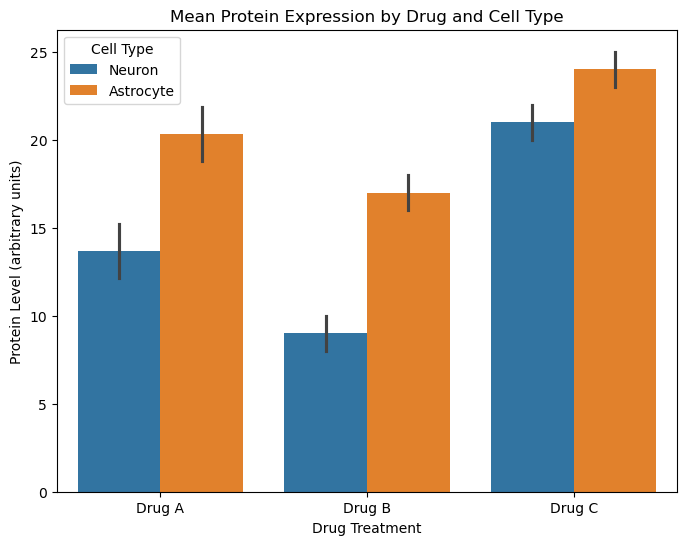

In [11]:
# A bar plot is great for comparing the mean of different groups.

# We'll use seaborn's barplot function:
plt.figure(figsize=(8, 6))  # Set plot size
sns.barplot(data=df, x='Drug', y='Protein_Level', hue='Cell_Type', ci='sd')

# Add labels and title
plt.title('Mean Protein Expression by Drug and Cell Type')
plt.ylabel('Protein Level (arbitrary units)')
plt.xlabel('Drug Treatment')
plt.legend(title='Cell Type')

# Show the plot
plt.show()


## 2. Box Plot: Visualizing Distribution of Protein Levels

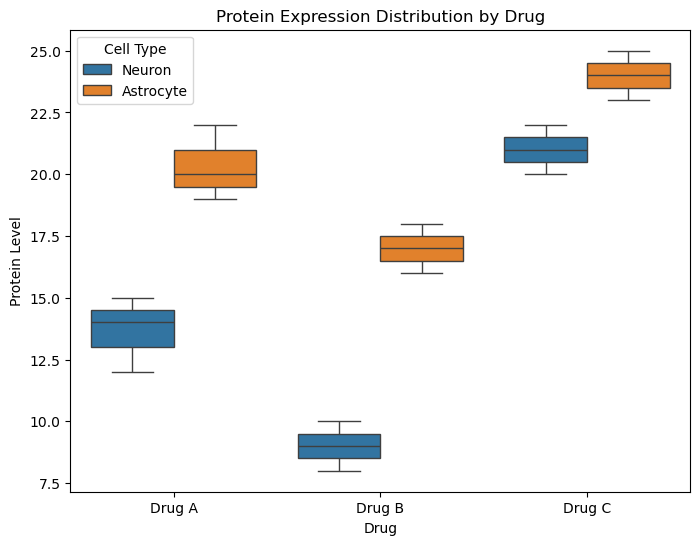

In [12]:
# Box plots are useful for seeing data spread and identifying outliers.

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Drug', y='Protein_Level', hue='Cell_Type')

plt.title('Protein Expression Distribution by Drug')
plt.ylabel('Protein Level')
plt.xlabel('Drug')
plt.legend(title='Cell Type')

plt.show()


## 3. Swarm Plot: See Individual Data Points

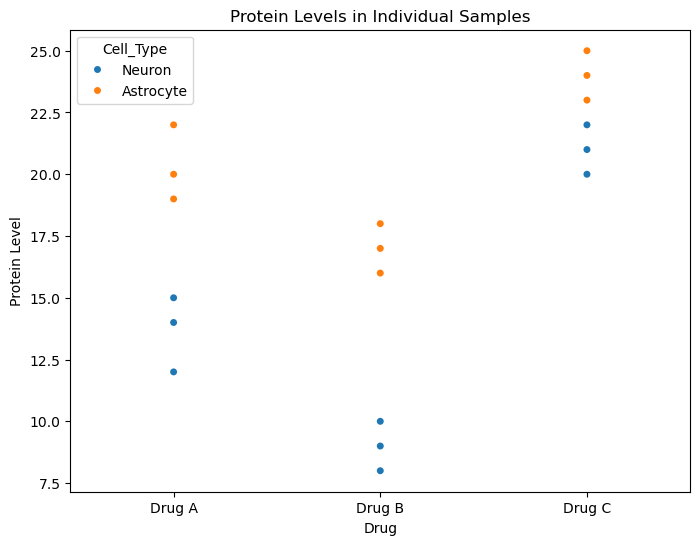

In [13]:
# Swarm plots show each data point to reveal clustering and variation.

plt.figure(figsize=(8, 6))
sns.swarmplot(data=df, x='Drug', y='Protein_Level', hue='Cell_Type')

plt.title('Protein Levels in Individual Samples')
plt.ylabel('Protein Level')
plt.xlabel('Drug')

plt.show()


## 4. Violin Plot: Combination of Box + Distribution

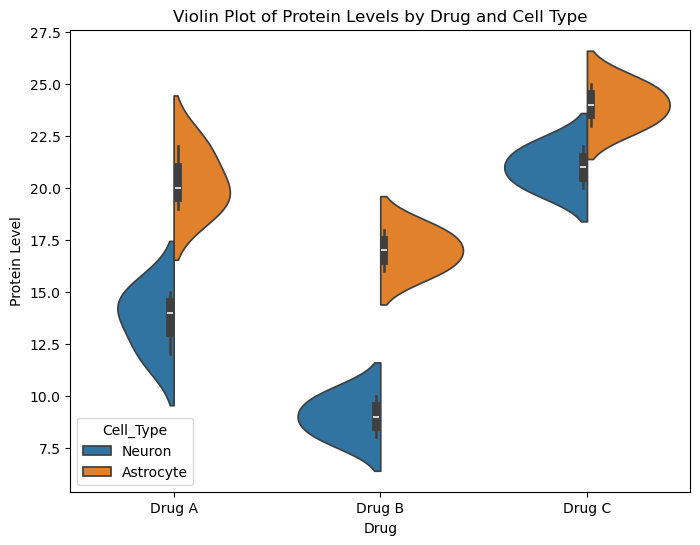

In [14]:
# A violin plot shows both the box plot and a kernel density estimate of the data.

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Drug', y='Protein_Level', hue='Cell_Type', split=True)

plt.title('Violin Plot of Protein Levels by Drug and Cell Type')
plt.ylabel('Protein Level')
plt.xlabel('Drug')

plt.show()


## 5. Heatmap: Correlation Between Numeric Variables

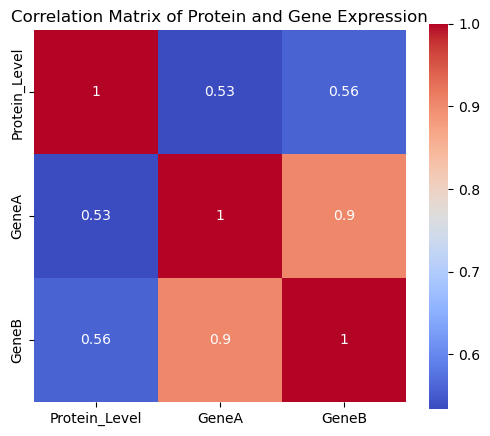

In [15]:
# Let's say we had a wider dataset — we can use heatmaps to show correlations.

# For demo, let's add some synthetic variables
df_extended = df.copy()
df_extended['GeneA'] = [1.2, 1.3, 1.5, 1.8, 1.6, 1.7] * 3
df_extended['GeneB'] = [2.1, 2.0, 2.2, 3.1, 3.0, 3.2] * 3

# Compute correlation matrix
corr = df_extended[['Protein_Level', 'GeneA', 'GeneB']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Matrix of Protein and Gene Expression')
plt.show()
